 This is a quick example showing how the Neural Network can perform non-linear regression on multivariable functions. In this case, it regresses a polynomial map from R^2 -> R^2.

In [1]:
import plotly.graph_objects as go
import random as rd
import numpy as np
import FeedForward.NeuralNetwork as nn

c = [-10, -5, -2, 5, 3, 5, 2, 1, -4, -1, 8, 1]

def alpha(x):
    f = c[0]*x[0]**3
    f+= c[1]*x[1]**3
    
    f+= c[2]*x[0]**2
    f+= c[3]*x[1]**2
    
    f+= c[4]*x[0]**1
    f+= c[5]*x[1]**1
    
    f+= c[6]*x[0]**0
    f+= c[7]*x[1]**0
    
    f+=c[8]*(x[1]**0)*(x[0]**3)
    f+=c[9]*(x[1]**1)*(x[0]**2)
    f+=c[10]*(x[1]**2)*(x[0]**1)
    f+=c[11]*(x[1]**3)*(x[0]**0)
    
    
    return f

d= [rd.randrange(-10,10,1) for i in range(12)]

def beta(x):
    f = d[0]*x[0]**3
    f+= d[1]*x[1]**3
    
    f+= d[2]*x[0]**2
    f+= d[3]*x[1]**2
    
    f+= d[4]*x[0]**1
    f+= d[5]*x[1]**1
    
    f+= d[6]*x[0]**0
    f+= d[7]*x[1]**0
    
    f+=d[8]*(x[1]**0)*(x[0]**3)
    f+=d[9]*(x[1]**1)*(x[0]**2)
    f+=d[10]*(x[1]**2)*(x[0]**1)
    f+=d[11]*(x[1]**3)*(x[0]**0)
    
    
    return f

def f(x):
    return np.array([alpha(x),beta(x)])

num_points = 20

X = np.linspace(-10,10,num_points)
XY = []
for x in X:
    for y in X:
        XY.append([x,y])
XY = np.array(XY).astype('double')
Z = np.array([f(xx) for xx in XY]).reshape(num_points**2,2)

#plotting Target Data
def _3dplot(XY,Z):
    X = XY[:,0]
    Y = XY[:,1]
    scatter3d = go.Scatter3d(x = X,
                             y = Y,
                             z = Z.flatten(),
                             mode = 'markers',
                             marker=dict(size=5, color=Z.flatten(), colorscale='Viridis'))

    scene = dict(xaxis_title='X-axis',yaxis_title='Y-axis',zaxis_title='Z-axis')
    layout = go.Layout(scene= scene)

    fig = go.Figure(data = [scatter3d],layout = layout)
    fig.show()

#alpha curve
_3dplot(XY,Z[:,0])

In [2]:
#beta surface
_3dplot(XY,Z[:,1])

In [3]:
def comparison(XY, Z, Prediction):
    X = XY[:, 0]
    Y = XY[:, 1]

    # Create a scatter plot for Z (surface representation)
    surface = go.Scatter3d(x=X, y=Y, z=Z.flatten(),mode = 'markers',marker=dict(size=3, color=Z.flatten(), colorscale='Viridis'),
                           name='Z Surface')

    # Create a scatter plot for Prediction (singular points representation)
    scatter_points = go.Scatter3d(x=X, y=Y, z=Prediction.flatten(), mode='markers',
                                  marker=dict(size=3, color='red', colorscale='Viridis'),
                                  name='Prediction Points')

    # Set the layout for the 3D plot
    scene = dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')
    layout = go.Layout(scene=scene, title='Comparison of Z Surface and Prediction Points')

    # Create the figure and add surface and scatter plots to it
    fig = go.Figure(data=[surface, scatter_points], layout=layout)

    # Show the figure
    fig.show()

def linear(x):
    return x
def linear_derivative(x):
    return np.ones_like(x)

H = [5,5] #hidden layers
A = [nn.tanh,nn.tanh]+[linear] #activation functions
dA = [nn.d_tanh,nn.d_tanh]+[linear_derivative] #and their derivatives
net =  nn.NeuralNetwork(Inputs=XY.reshape(-1,2,1),
                        hidden_sizes=H, 
                        Targets=Z.reshape(-1,2,1),
                        activation_functions=A,
                        activation_function_derivs=dA,
                        CostFunction=nn.MSE,
                        lbound=-0.9, 
                        ubound=0.9)

#specify optimizer
opt = nn.Adam(net,method='BGD')

learning_rate = lambda x: max(0.01*(0.5)**(x/2500),0.0001) #can be constant or can be a function of 'epoch'. No significance behind why I chose this function, just showing it off tbh.
net.Train(epochs=10000,learning_rate=learning_rate,Optimizer =opt,report_every=100)

In [4]:
comparison(XY, Z[:,0], net.Predict()[:,0])

In [5]:
comparison(XY, Z[:,1], net.Predict()[:,1])

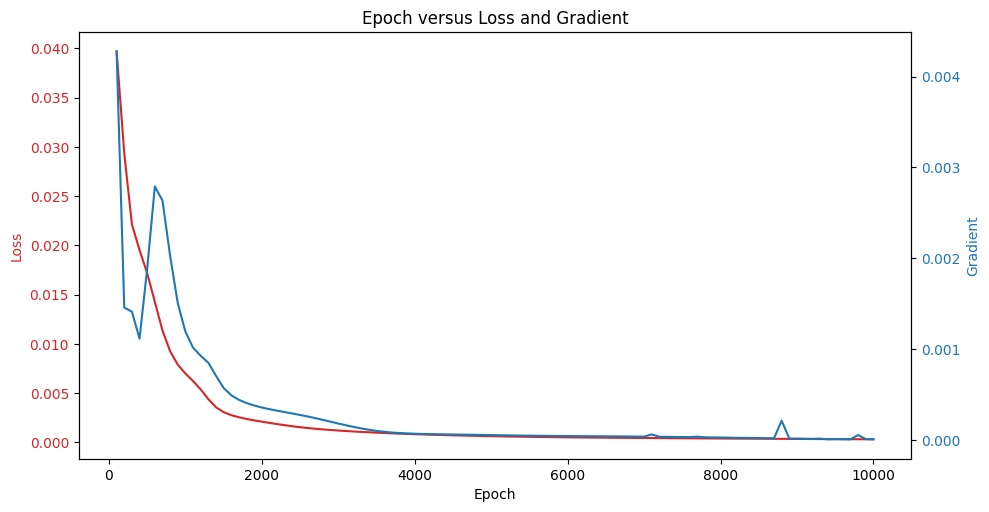

In [6]:
net.showTraining(figsize = (10,5))

Hello


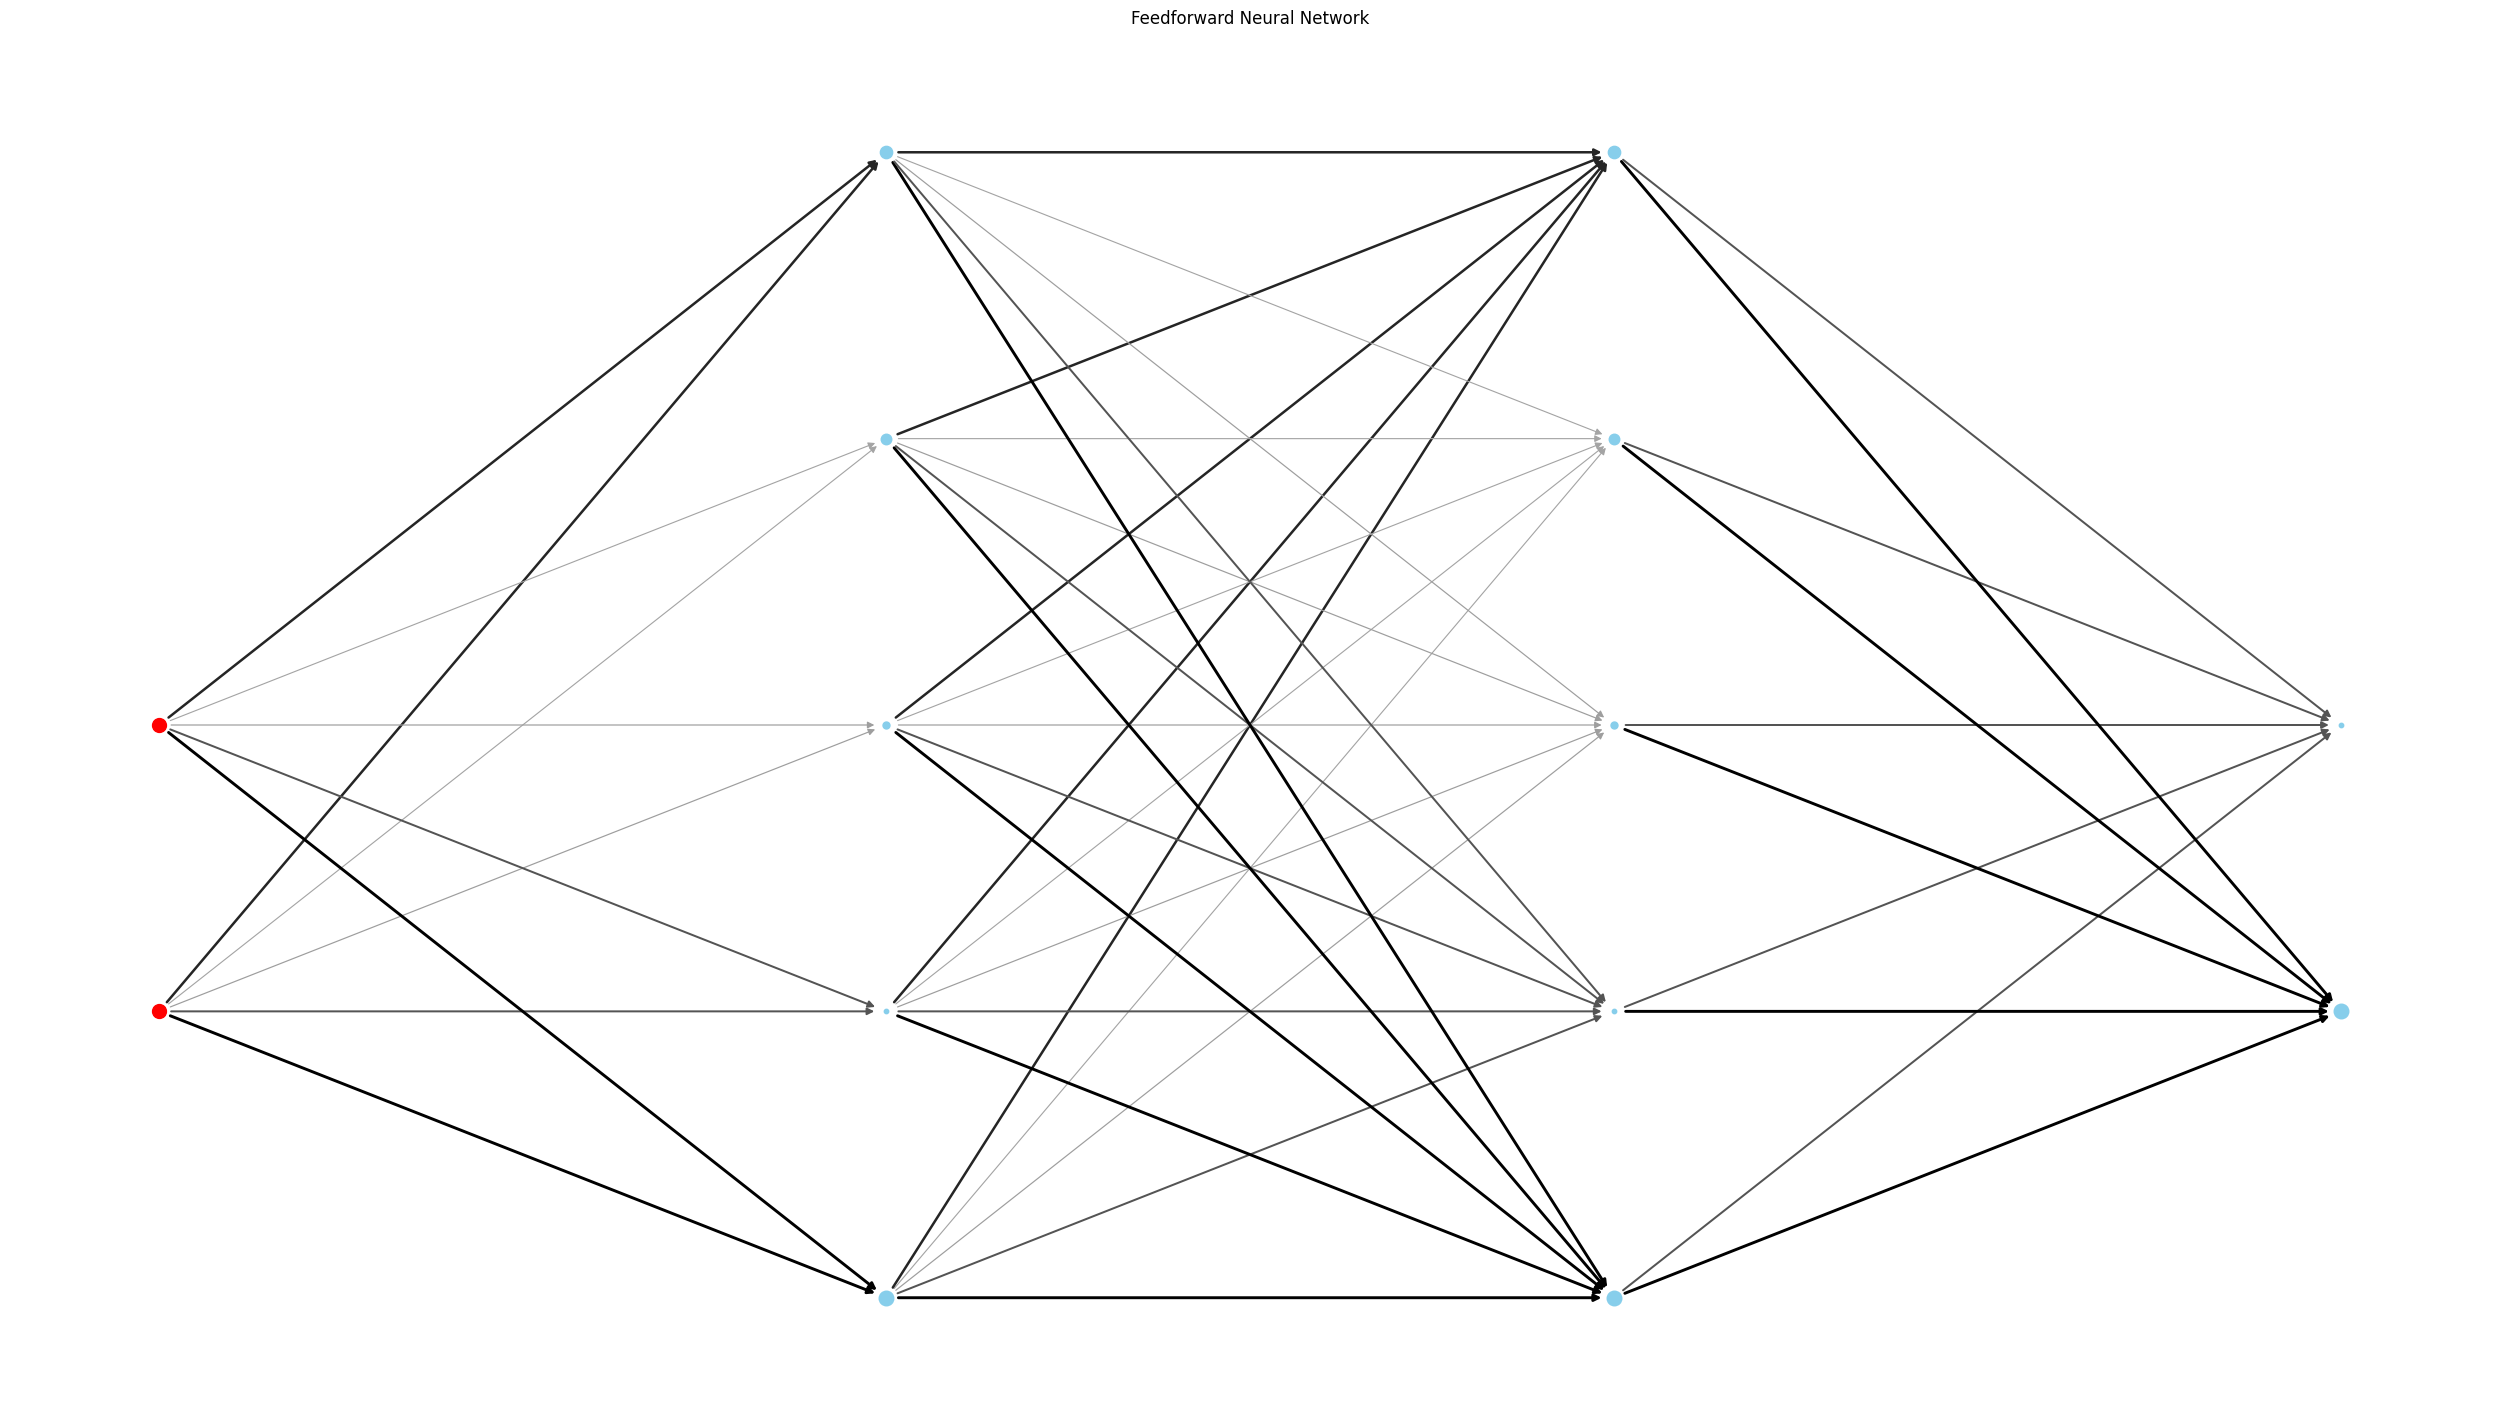

In [7]:
net.CreateGraph()